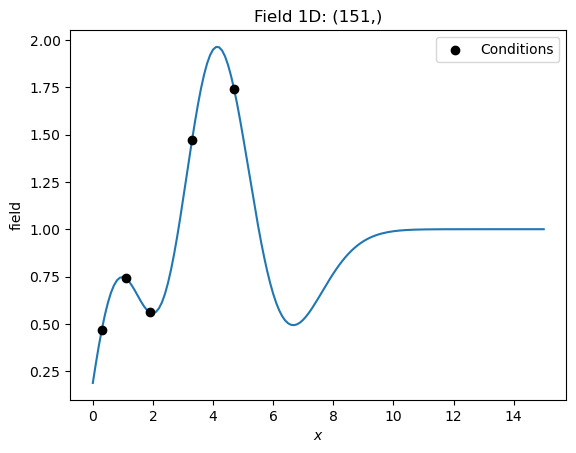

In [11]:
r"""
Simple Kriging
--------------

Simple kriging assumes a known mean of the data.
For simplicity we assume a mean of 0,
which can be achieved by subtracting the mean from the observed values and
subsequently adding it to the resulting data.

The resulting equation system for :math:`W` is given by:

.. math::

   W = \begin{pmatrix}c(x_1,x_1) & \cdots & c(x_1,x_n) \\
   \vdots & \ddots & \vdots  \\
   c(x_n,x_1) & \cdots & c(x_n,x_n)
   \end{pmatrix}^{-1}
   \begin{pmatrix}c(x_1,x_0) \\ \vdots \\ c(x_n,x_0) \end{pmatrix}

Thereby :math:`c(x_i,x_j)` is the covariance of the given observations.


Example
^^^^^^^

Here we use simple kriging in 1D (for plotting reasons) with 5 given observations/conditions.
The mean of the field has to be given beforehand.

"""
import numpy as np

from gstools import Gaussian, krige

# condtions
cond_pos = [0.3, 1.9, 1.1, 3.3, 4.7]
cond_val = [0.47, 0.56, 0.74, 1.47, 1.74]
# resulting grid
gridx = np.linspace(0.0, 15.0, 151)
# spatial random field class
model = Gaussian(dim=1, var=0.5, len_scale=2)

###############################################################################
krig = krige.Simple(model, mean=1, cond_pos=cond_pos, cond_val=cond_val)
krig(gridx)

###############################################################################
ax = krig.plot()
ax.scatter(cond_pos, cond_val, color="k", zorder=10, label="Conditions")
ax.legend()


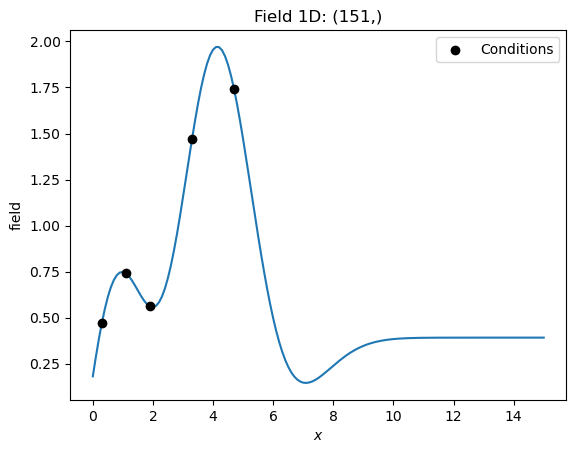

In [12]:
r"""
Ordinary Kriging
----------------

Ordinary kriging will estimate an appropriate mean of the field,
based on the given observations/conditions and the covariance model used.

The resulting system of equations for :math:`W` is given by:

.. math::

   \begin{pmatrix}W\\\mu\end{pmatrix} = \begin{pmatrix}
   c(x_1,x_1) & \cdots & c(x_1,x_n) &1 \\
   \vdots & \ddots & \vdots  & \vdots \\
   c(x_n,x_1) & \cdots & c(x_n,x_n) & 1 \\
   1 &\cdots& 1 & 0
   \end{pmatrix}^{-1}
   \begin{pmatrix}c(x_1,x_0) \\ \vdots \\ c(x_n,x_0) \\ 1\end{pmatrix}

Thereby :math:`c(x_i,x_j)` is the covariance of the given observations
and :math:`\mu` is a Lagrange multiplier to minimize the kriging error and estimate the mean.


Example
^^^^^^^

Here we use ordinary kriging in 1D (for plotting reasons) with 5 given observations/conditions.
The estimated mean can be accessed by ``krig.mean``.
"""
import numpy as np

from gstools import Gaussian, krige

# condtions
cond_pos = [0.3, 1.9, 1.1, 3.3, 4.7]
cond_val = [0.47, 0.56, 0.74, 1.47, 1.74]
# resulting grid
gridx = np.linspace(0.0, 15.0, 151)
# spatial random field class
model = Gaussian(dim=1, var=0.5, len_scale=2)

###############################################################################
krig = krige.Ordinary(model, cond_pos=cond_pos, cond_val=cond_val)
krig(gridx)

###############################################################################
ax = krig.plot()
ax.scatter(cond_pos, cond_val, color="k", zorder=10, label="Conditions")
ax.legend()


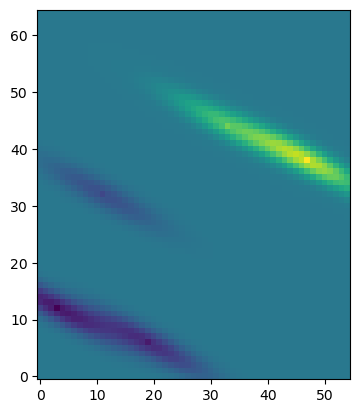

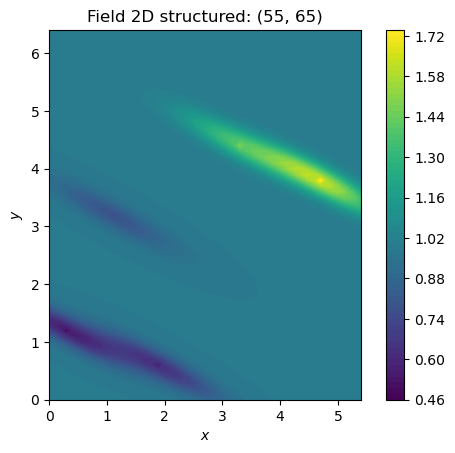

In [13]:
"""
Interface to PyKrige
--------------------

To use fancier methods like
`regression kriging <https://en.wikipedia.org/wiki/Regression-kriging>`__,
we provide an interface to
`PyKrige <https://github.com/GeoStat-Framework/PyKrige>`__ (>v1.5), which means
you can pass a GSTools covariance model to the kriging routines of PyKrige.

To demonstrate the general workflow, we compare ordinary kriging of PyKrige
with the corresponding GSTools routine in 2D:
"""
import numpy as np
from matplotlib import pyplot as plt
from pykrige.ok import OrdinaryKriging

import gstools as gs

# conditioning data
cond_x = [0.3, 1.9, 1.1, 3.3, 4.7]
cond_y = [1.2, 0.6, 3.2, 4.4, 3.8]
cond_val = [0.47, 0.56, 0.74, 1.47, 1.74]

# grid definition for output field
gridx = np.arange(0.0, 5.5, 0.1)
gridy = np.arange(0.0, 6.5, 0.1)

###############################################################################
# A GSTools based :any:`Gaussian` covariance model:

model = gs.Gaussian(
    dim=2, len_scale=1, anis=0.2, angles=-0.5, var=0.5, nugget=0.1
)

###############################################################################
# Ordinary Kriging with PyKrige
# ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
#
# One can pass the defined GSTools model as
# variogram model, which will `not` be fitted to the given data.
# By providing the GSTools model, rotation and anisotropy are also
# automatically defined:

OK1 = OrdinaryKriging(cond_x, cond_y, cond_val, variogram_model=model)
z1, ss1 = OK1.execute("grid", gridx, gridy)
plt.imshow(z1, origin="lower")
plt.show()

###############################################################################
# Ordinary Kriging with GSTools
# ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
#
# The :any:`Ordinary` kriging class is provided by GSTools as a shortcut to
# define ordinary kriging with the general :any:`Krige` class.
#
# PyKrige's routines are using exact kriging by default (when given a nugget).
# To reproduce this behavior in GSTools, we have to set ``exact=True``.

OK2 = gs.krige.Ordinary(model, [cond_x, cond_y], cond_val, exact=True)
OK2.structured([gridx, gridy])
ax = OK2.plot()
ax.set_aspect("equal")


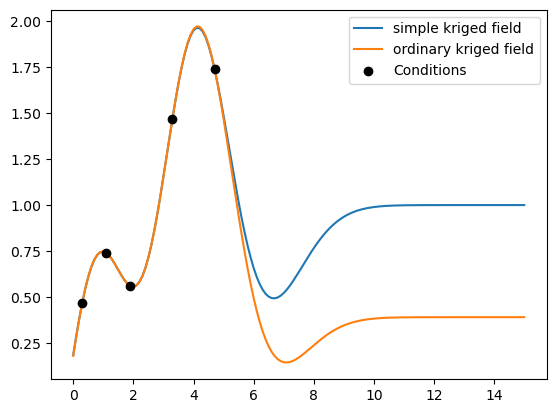

In [14]:
"""
Compare Kriging
---------------
"""
import matplotlib.pyplot as plt
import numpy as np

from gstools import Gaussian, krige

# condtions
cond_pos = [0.3, 1.9, 1.1, 3.3, 4.7]
cond_val = [0.47, 0.56, 0.74, 1.47, 1.74]
# resulting grid
gridx = np.linspace(0.0, 15.0, 151)

###############################################################################
# A gaussian variogram model.

model = Gaussian(dim=1, var=0.5, len_scale=2)

###############################################################################
# Two kriged fields. One with simple and one with ordinary kriging.

kr1 = krige.Simple(model=model, mean=1, cond_pos=cond_pos, cond_val=cond_val)
kr2 = krige.Ordinary(model=model, cond_pos=cond_pos, cond_val=cond_val)
kr1(gridx)
kr2(gridx)

###############################################################################

plt.plot(gridx, kr1.field, label="simple kriged field")
plt.plot(gridx, kr2.field, label="ordinary kriged field")
plt.scatter(cond_pos, cond_val, color="k", zorder=10, label="Conditions")
plt.legend()
plt.show()


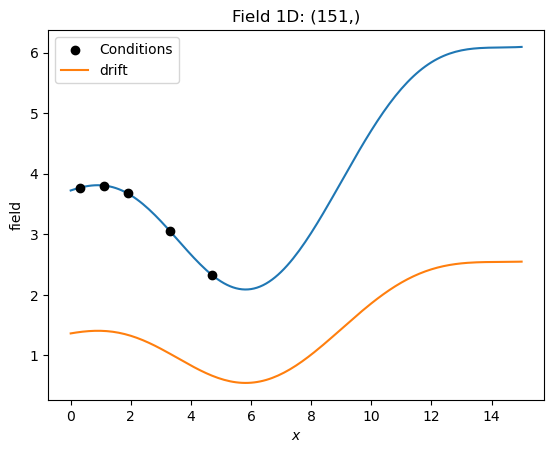

In [15]:
"""
External Drift Kriging
----------------------
"""
import numpy as np

from gstools import SRF, Gaussian, krige

# synthetic condtions with a drift
drift_model = Gaussian(dim=1, len_scale=4)
drift = SRF(drift_model, seed=1010)
cond_pos = [0.3, 1.9, 1.1, 3.3, 4.7]
ext_drift = drift(cond_pos)
cond_val = ext_drift * 2 + 1
# resulting grid
gridx = np.linspace(0.0, 15.0, 151)
grid_drift = drift(gridx)
# kriging
model = Gaussian(dim=1, var=2, len_scale=4)
krig = krige.ExtDrift(model, cond_pos, cond_val, ext_drift)
krig(gridx, ext_drift=grid_drift)
ax = krig.plot()
ax.scatter(cond_pos, cond_val, color="k", zorder=10, label="Conditions")
ax.plot(gridx, grid_drift, label="drift")
ax.legend()


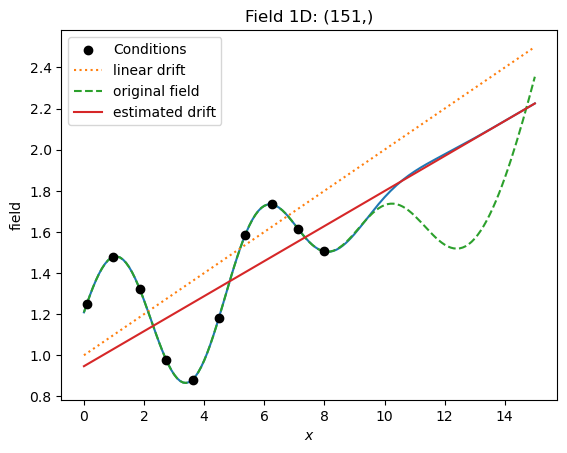

In [16]:
"""
Universal Kriging
-----------------

You can give a polynomial order or a list of self defined
functions representing the internal drift of the given values.
This drift will be fitted internally during the kriging interpolation.

In the following we are creating artificial data, where a linear drift
was added. The resulting samples are then used as input for Universal kriging.

The "linear" drift is then estimated during the interpolation.
To access only the estimated mean/drift, we provide a switch `only_mean`
in the call routine.
"""
import numpy as np

from gstools import SRF, Gaussian, krige

# synthetic condtions with a drift
drift_model = Gaussian(dim=1, var=0.1, len_scale=2)
drift = SRF(drift_model, seed=101)
cond_pos = np.linspace(0.1, 8, 10)
cond_val = drift(cond_pos) + cond_pos * 0.1 + 1
# resulting grid
gridx = np.linspace(0.0, 15.0, 151)
drift_field = drift(gridx) + gridx * 0.1 + 1
# kriging
model = Gaussian(dim=1, var=0.1, len_scale=2)
krig = krige.Universal(model, cond_pos, cond_val, "linear")
krig(gridx)
ax = krig.plot()
ax.scatter(cond_pos, cond_val, color="k", zorder=10, label="Conditions")
ax.plot(gridx, gridx * 0.1 + 1, ":", label="linear drift")
ax.plot(gridx, drift_field, "--", label="original field")

mean = krig(gridx, only_mean=True)
ax.plot(gridx, mean, label="estimated drift")

ax.legend()


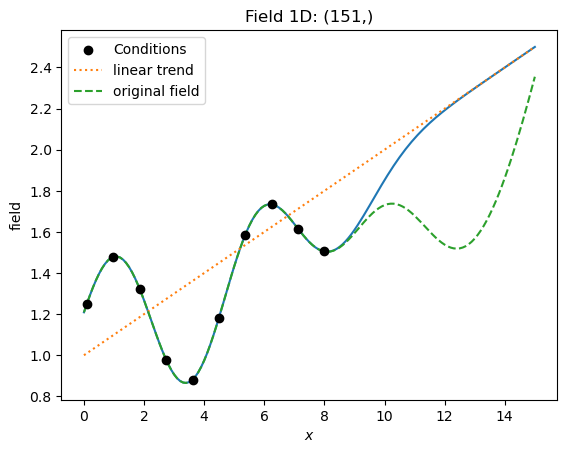

In [17]:
"""
Detrended Kriging
-----------------
"""
import numpy as np

from gstools import SRF, Gaussian, krige


def trend(x):
    """Example for a simple linear trend."""
    return x * 0.1 + 1


# synthetic condtions with trend/drift
drift_model = Gaussian(dim=1, var=0.1, len_scale=2)
drift = SRF(drift_model, seed=101)
cond_pos = np.linspace(0.1, 8, 10)
cond_val = drift(cond_pos) + trend(cond_pos)
# resulting grid
gridx = np.linspace(0.0, 15.0, 151)
drift_field = drift(gridx) + trend(gridx)
# kriging
model = Gaussian(dim=1, var=0.1, len_scale=2)
krig_trend = krige.Detrended(model, cond_pos, cond_val, trend)
krig_trend(gridx)
ax = krig_trend.plot()
ax.scatter(cond_pos, cond_val, color="k", zorder=10, label="Conditions")
ax.plot(gridx, trend(gridx), ":", label="linear trend")
ax.plot(gridx, drift_field, "--", label="original field")
ax.legend()


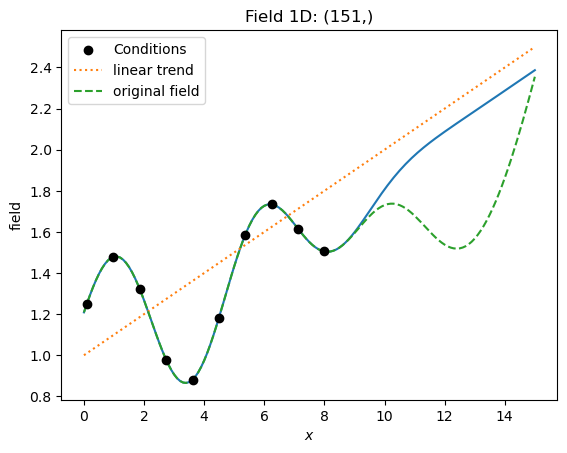

In [18]:
"""
Detrended Ordinary Kriging
--------------------------
"""
import numpy as np

from gstools import SRF, Gaussian, krige


def trend(x):
    """Example for a simple linear trend."""
    return x * 0.1 + 1


# synthetic condtions with trend/drift
drift_model = Gaussian(dim=1, var=0.1, len_scale=2)
drift = SRF(drift_model, seed=101)
cond_pos = np.linspace(0.1, 8, 10)
cond_val = drift(cond_pos) + trend(cond_pos)
# resulting grid
gridx = np.linspace(0.0, 15.0, 151)
drift_field = drift(gridx) + trend(gridx)
# kriging
model = Gaussian(dim=1, var=0.1, len_scale=2)
krig_trend = krige.Ordinary(model, cond_pos, cond_val, trend=trend)
krig_trend(gridx)
ax = krig_trend.plot()
ax.scatter(cond_pos, cond_val, color="k", zorder=10, label="Conditions")
ax.plot(gridx, trend(gridx), ":", label="linear trend")
ax.plot(gridx, drift_field, "--", label="original field")
ax.legend()


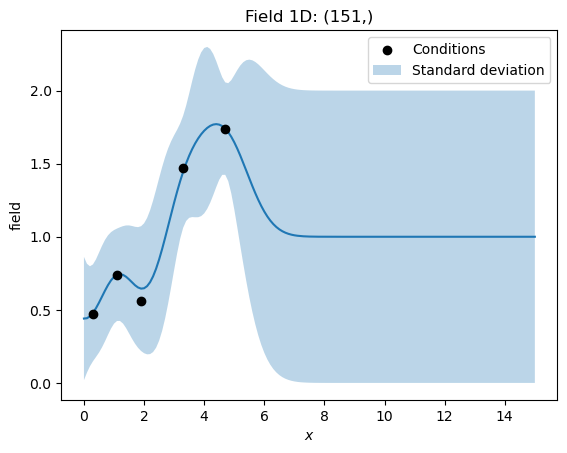

In [19]:
r"""
Incorporating measurement errors
--------------------------------

To incorporate the nugget effect and/or given measurement errors,
one can set `exact` to `False` and provide either individual measurement errors
for each point or set the nugget as a constant measurement error everywhere.

In the following we will show the influence of the nugget and
measurement errors.
"""

import numpy as np

import gstools as gs

# condtions
cond_pos = [0.3, 1.1, 1.9, 3.3, 4.7]
cond_val = [0.47, 0.74, 0.56, 1.47, 1.74]
cond_err = [0.01, 0.0, 0.1, 0.05, 0]
# resulting grid
gridx = np.linspace(0.0, 15.0, 151)
# spatial random field class
model = gs.Gaussian(dim=1, var=0.9, len_scale=1, nugget=0.1)

###############################################################################
# Here we will use Simple kriging (`unbiased=False`) to interpolate the given
# conditions.

krig = gs.Krige(
    model=model,
    cond_pos=cond_pos,
    cond_val=cond_val,
    mean=1,
    unbiased=False,
    exact=False,
    cond_err=cond_err,
)
krig(gridx)

###############################################################################
# Let's plot the data. You can see, that the estimated values differ more from
# the input, when the given measurement errors get bigger.
# In addition we plot the standard deviation.

ax = krig.plot()
ax.scatter(cond_pos, cond_val, color="k", zorder=10, label="Conditions")
ax.fill_between(
    gridx,
    # plus/minus standard deviation (70 percent confidence interval)
    krig.field - np.sqrt(krig.krige_var),
    krig.field + np.sqrt(krig.krige_var),
    alpha=0.3,
    label="Standard deviation",
)
ax.legend()


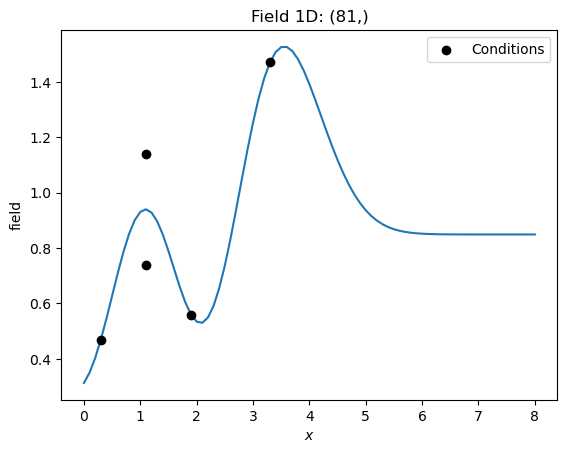

In [20]:
r"""
Redundant data and pseudo-inverse
---------------------------------

It can happen, that the kriging system gets numerically unstable.
One reason could be, that the input data contains redundant conditioning points
that hold different values.

To smoothly deal with such situations, you can use the pseudo
inverse for the kriging matrix, which is enabled by default.

This will result in the average value for the redundant data.

Example
^^^^^^^

In the following we have two different values at the same location.
The resulting kriging field will hold the average at this point.
"""
import numpy as np

from gstools import Gaussian, krige

# condtions
cond_pos = [0.3, 1.9, 1.1, 3.3, 1.1]
cond_val = [0.47, 0.56, 0.74, 1.47, 1.14]
# resulting grid
gridx = np.linspace(0.0, 8.0, 81)
# spatial random field class
model = Gaussian(dim=1, var=0.5, len_scale=1)

###############################################################################
krig = krige.Ordinary(model, cond_pos=cond_pos, cond_val=cond_val)
krig(gridx)

###############################################################################
ax = krig.plot()
ax.scatter(cond_pos, cond_val, color="k", zorder=10, label="Conditions")
ax.legend()
